In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/home/abduttayyeb/Desktop/GeeksForGeeks/Graph_Data.csv")


Bad key "text.kerning_factor" on line 4 in
/home/abduttayyeb/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# KDE Plot 

15

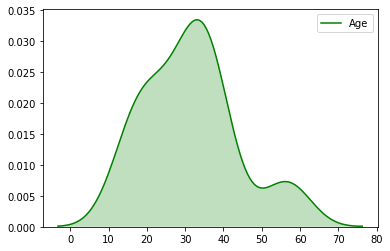

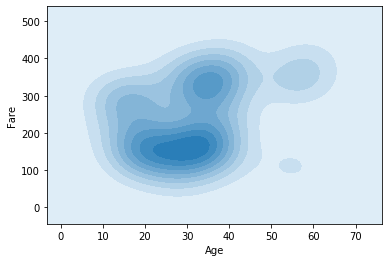

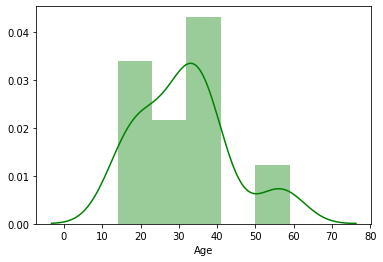

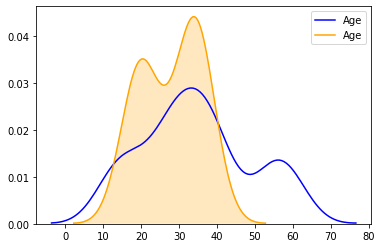

In [26]:

# 
dataset.Age[(dataset["Age"]>=20) & (dataset["Age"]<=40)].count()
sns.kdeplot(dataset["Age"],color = "green",shade=True)
plt.figure()

# Bivariate Densities
dataset.Age[((dataset["Fare"]>=100) & (dataset["Fare"]<=200)) & ((dataset["Age"]>=30) & dataset["Age"]<=40)].count()
sns.kdeplot(dataset["Age"],dataset["Fare"],shade=True)
plt.figure()

# Histogram + KDE
dataset.Age[(dataset["Age"]>=20) & (dataset["Age"]<=40)].count()
sns.distplot(dataset["Age"],color = "green")
plt.figure()


# It Show's that there are more Male's Between Age Of 12-40
dataset[((dataset["Age"]>=12) & (dataset["Age"]<=40))]
sns.kdeplot(dataset[dataset.Gender=='Female']['Age'], color="blue")
sns.kdeplot(dataset[dataset.Gender=='Male']['Age'], color="orange",shade=True)
dataset.Gender[((dataset["Age"]>=12) & (dataset["Age"]<=40)) & (dataset["Gender"]=="Female")].count()




# Violin Plot

array([22, 38, 26, 35, 30, 54, 20, 27, 14, 40, 58, 39, 55, 34, 31, 28, 59,
       29, 19, 21, 16])

2

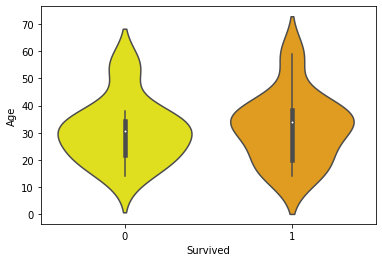

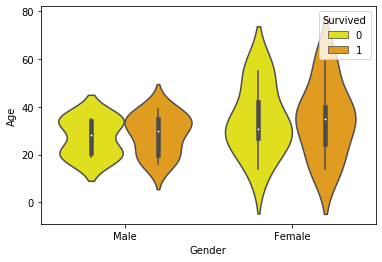

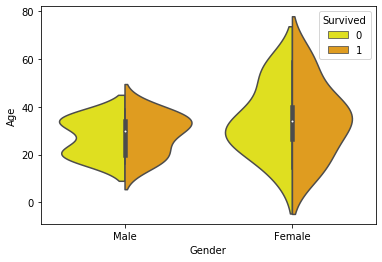

In [31]:
# Relation Between Survival Rate And Age
dataset.Survived[(dataset["Age"]>=20)&(dataset["Age"]<=40)&(dataset["Survived"]==0)].count()
sns.violinplot(x='Survived', y='Age', data=dataset, palette={0: "yellow", 1: "orange"})
plt.figure()

#Overall if we see Survival rate of female is more as compared to male 
dataset[(dataset["Gender"]=="Male") & (dataset["Survived"]==1)]
dataset[(dataset["Gender"]=="Female") & (dataset["Survived"]==1)]
sns.violinplot(x="Gender",y="Age",hue="Survived",data=dataset,palette={0:"yellow",1:"orange"})
plt.figure()

#More Precisely we can split the 4 seperate sections into two
sns.violinplot(x="Gender",y="Age",hue="Survived",data=dataset,palette={0:"yellow",1:"orange"},split=True)
dataset.Survived[(dataset["Age"]>=50)&(dataset["Age"]<=70)&(dataset["Survived"]==0)].count()

# CATPLOT

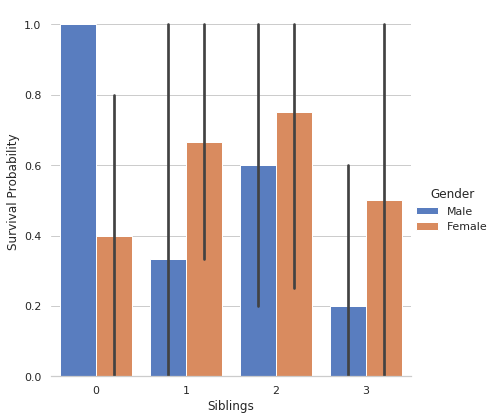

In [145]:
dataset[(dataset["Siblings"]==0) & (dataset["Survived"]==1)]
dataset[(dataset["Siblings"]==1) & (dataset["Survived"]==1)]
dataset[(dataset["Siblings"]==2) & (dataset["Survived"]==1)]

sns.set(style="whitegrid")

# Draw a nested barplot to show survival for Siblings and Gender
g = sns.catplot(x="Siblings", y="Survived", hue="Gender", data=dataset,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival Probability")


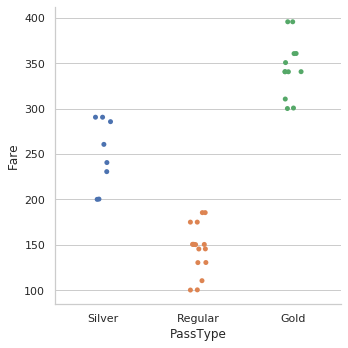

In [138]:
#Based On Fare There Are 3 Types Of Tickets  
sns.catplot(x="PassType", y="Fare", data=dataset);

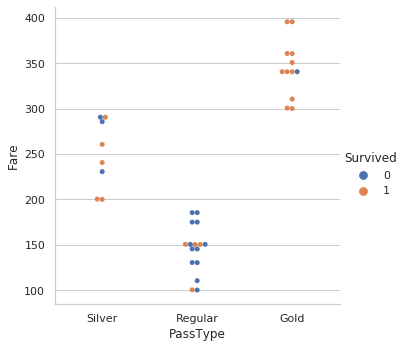

In [144]:
sns.catplot(x="PassType", y="Fare", hue="Survived",kind="swarm",data=dataset)

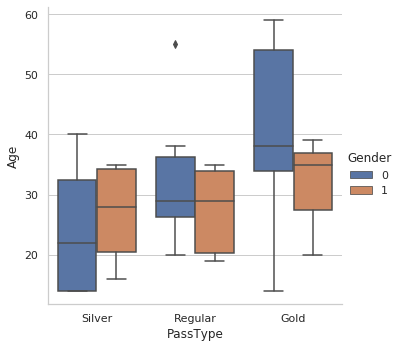

In [175]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_gen=le.fit_transform(dataset["Gender"])
data_pass=le.fit_transform(dataset["PassType"])
data_sur=dataset["Survived"]
data_new=pd.concat((pd.DataFrame(data_gen,columns=["Gender"]),dataset["PassType"],pd.DataFrame(data_sur),dataset["Age"]),1)
sns.catplot(x="PassType", y="Age",hue="Gender",kind="box",data=data_new);
